In [ ]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt

np.random.seed(1000)

In [ ]:
I = np.random.rand(3, 3)
print(I)

[[0.65358959 0.11500694 0.95028286]
 [0.4821914  0.87247454 0.21233268]
 [0.04070962 0.39719446 0.2331322 ]]


(-0.5, 2.5, 2.5, -0.5)

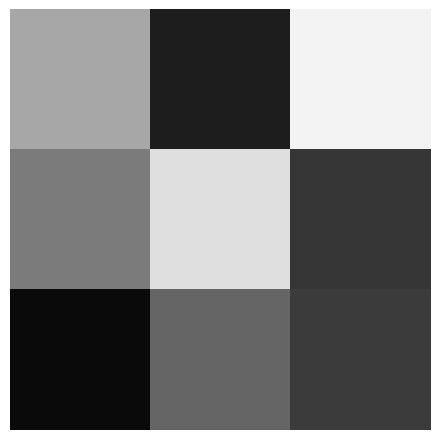

In [ ]:
io.imshow(I)
plt.axis("off")

In [ ]:
I2 = I + 0.5
print(I2)

[[1.15358959 0.61500694 1.45028286]
 [0.9821914  1.37247454 0.71233268]
 [0.54070962 0.89719446 0.7331322 ]]


(-0.5, 2.5, 2.5, -0.5)

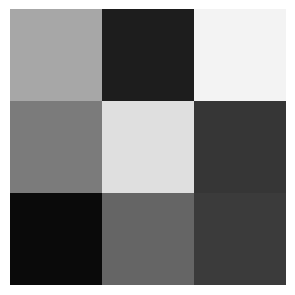

In [ ]:
# option 1
I2[I2 > 1] = 1
I2[I2 < 0] = 0

# option 2
I2 = np.clip(I+0.5, 0, 1)
plt.subplot(1, 2, 1)
io.imshow(I)
plt.axis("off")

(-0.5, 2.5, 2.5, -0.5)

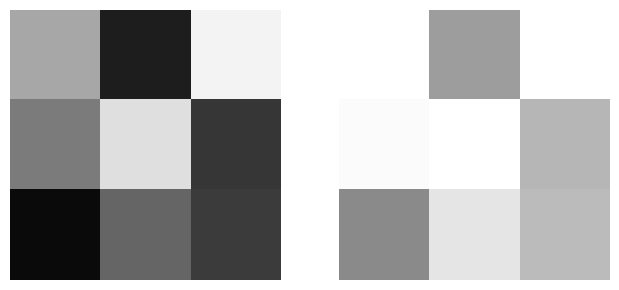

In [ ]:
plt.subplot(1, 2, 1)
io.imshow(I)
plt.axis("off")

plt.subplot(1, 2, 2)
io.imshow(I2)
plt.axis("off")

In [ ]:
I3 = np.clip(I - 0.5, 0, 1)

Text(0.5, 1.0, 'I-0.5')

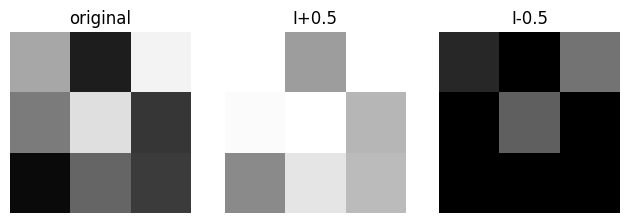

In [ ]:
plt.subplot(1, 3, 1)
io.imshow(I)
plt.axis("off")
plt.title("original")

plt.subplot(1, 3, 2)
io.imshow(I2)
plt.axis("off")
plt.title("I+0.5")

plt.subplot(1, 3, 3)
io.imshow(I3)
plt.axis("off")
plt.title("I-0.5")

Text(0.5, 1.0, 'I/2')

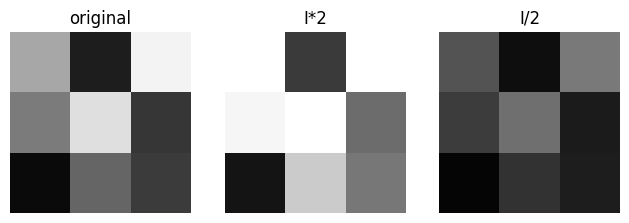

In [ ]:
I2 = np.clip(I*2, 0, 1)
I3 = np.clip(I/2, 0, 1)

plt.subplot(1, 3, 1)
io.imshow(I)
plt.axis("off")
plt.title("original")

plt.subplot(1, 3, 2)
io.imshow(I2)
plt.axis("off")
plt.title("I*2")

plt.subplot(1, 3, 3)
io.imshow(I3)
plt.axis("off")
plt.title("I/2")

In [ ]:
!ls

sample_data


In [ ]:
I = io.imread("landsat_down.jpeg")
I = I/255.0
I.shape

(1901, 2010)

In [ ]:
print(I.min())
print(I.max())

0.0
1.0


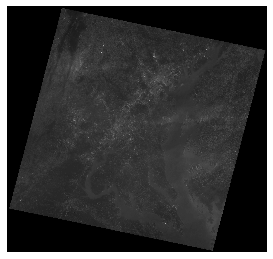

In [ ]:
io.imshow(I)
plt.axis("off")
plt.show()

In [ ]:
#WRONG
I_stretched = 4*(I-0.1)

In [ ]:
print(I_stretched.min())
print(I_stretched.max())

-0.4
3.6


In [ ]:
#RIGHT
I_stretched = np.clip(4*(I-0.1), 0, 1)

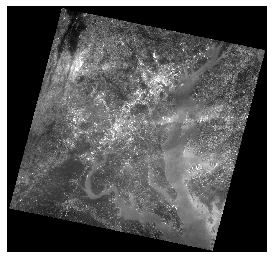

In [ ]:
io.imshow(I_stretched)
plt.axis("off")
plt.show()

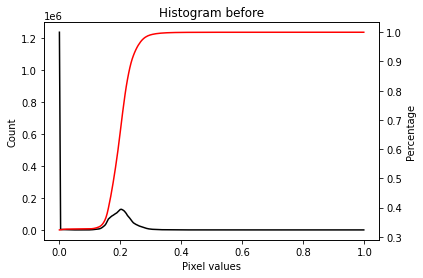

In [ ]:
hist, bins_hist = exposure.histogram(I, nbins=256, normalize=False)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("Pixel values")
plt.ylabel("Count")
plt.title("Histogram before")

plt.twinx()
img_cdf, bins = exposure.cumulative_distribution(I, 256)
plt.plot(bins, img_cdf, "red")
plt.ylabel("Percentage")
plt.show()

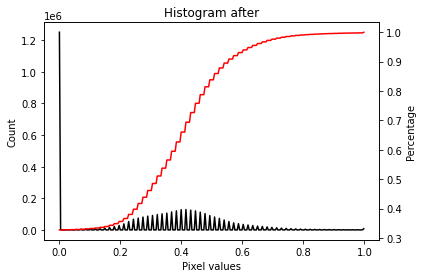

In [ ]:
hist, bins_hist = exposure.histogram(I_stretched, nbins=256, normalize=False)
plt.plot(bins_hist, hist, 'k')
plt.xlabel("Pixel values")
plt.ylabel("Count")
plt.title("Histogram after")

plt.twinx()
img_cdf, bins = exposure.cumulative_distribution(I_stretched, 256)
plt.plot(bins, img_cdf, "red")
plt.ylabel("Percentage")
plt.show()

In [ ]:
I = io.imread("xray.jpeg")/255
I = color.rgb2gray(I)

(-0.5, 3536.5, 2830.5, -0.5)

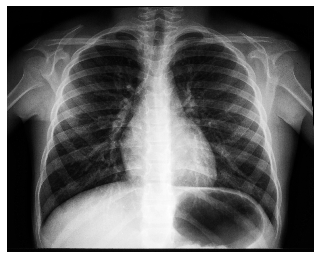

In [ ]:
io.imshow(I)
plt.axis("off")

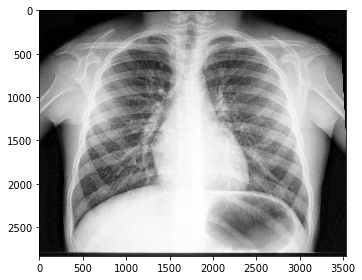

In [ ]:
k = 20
I2 = np.log(1 + k*I)
I2 = I2/I2.max()
io.imshow(I2)

In [ ]:
I3 = 1 - I

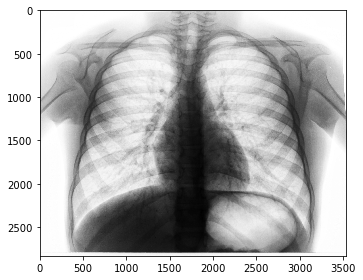

In [ ]:
io.imshow(I3)

In [ ]:
gamma = 3
c = 1
I4 = c*(I ** gamma)
print(I4.min())
print(I4.max())

0.0
0.9975020827546299


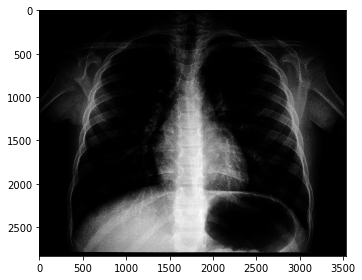

In [ ]:
io.imshow(I4)

In [18]:
I = io.imread("angiogram.jpg")
I = I[:,:,0]/255
I.shape

(215, 234)

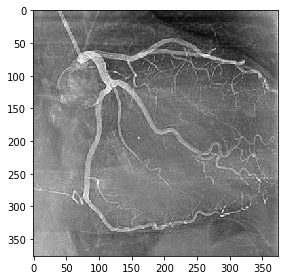

In [ ]:
io.imshow(1-I)
#plt.axis("off")

In [ ]:
negImg = 1 - I

In [ ]:
A = 0.6
B = 0.85
negImg[negImg < A] = 0
negImg[negImg > B] = 0

negImg[(negImg >= A) & (negImg <= B)] = 1

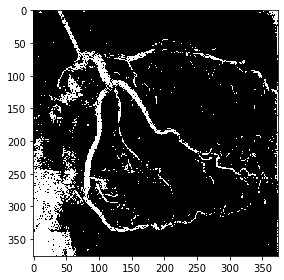

In [ ]:
io.imshow(negImg)

In [ ]:
negImg2 = 1 - I

In [ ]:
A = 0.6
B = 0.85

negImg2[(negImg2 >= A) & (negImg2 <= B)] = 1

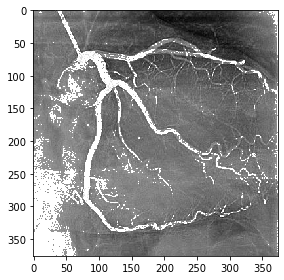

In [ ]:
io.imshow(negImg2)

In [ ]:
r ** gamma